# Machine Learning Retraining Image Classifier with TF

Let's retrain the inception network to classify new image classes.

In [3]:
import os

## Getting the dataset and setting things up

First let's download the dataset.

In [7]:
cmd = '''mkdir tf_files && \
cd tf_files && \
curl -O http://download.tensorflow.org/example_images/flower_photos.tgz && \
tar xzf flower_photos.tgz && \
rm flower_photos.tgz && \
cd ..'''

os.system(cmd)

0

## Now retrain on the dataset

This is done by calling the tensorflow script provided in the examples folder.

In [8]:
cmd = '''cd ../tensorflow && \
python tensorflow/examples/image_retraining/retrain.py \
	--bottleneck_dir=../ml-notebooks/tf_files/bottlenecks \
	--how_many_training_steps 500 \
	--model_dir=../ml-notebooks/tf_files/inception \
	--output_graph=../ml-notebooks/tf_files/retrained_graph.pb \
	--output_labels=../ml-notebooks/tf_files/retrained_labels.txt \
	--image_dir ../ml-notebooks/tf_files/flower_photos'''
os.system(cmd)

0

## Using the model

Now let's use the trained model to evaluate it on an image of a rose.

First let's see if our rose actually looks like a rose.

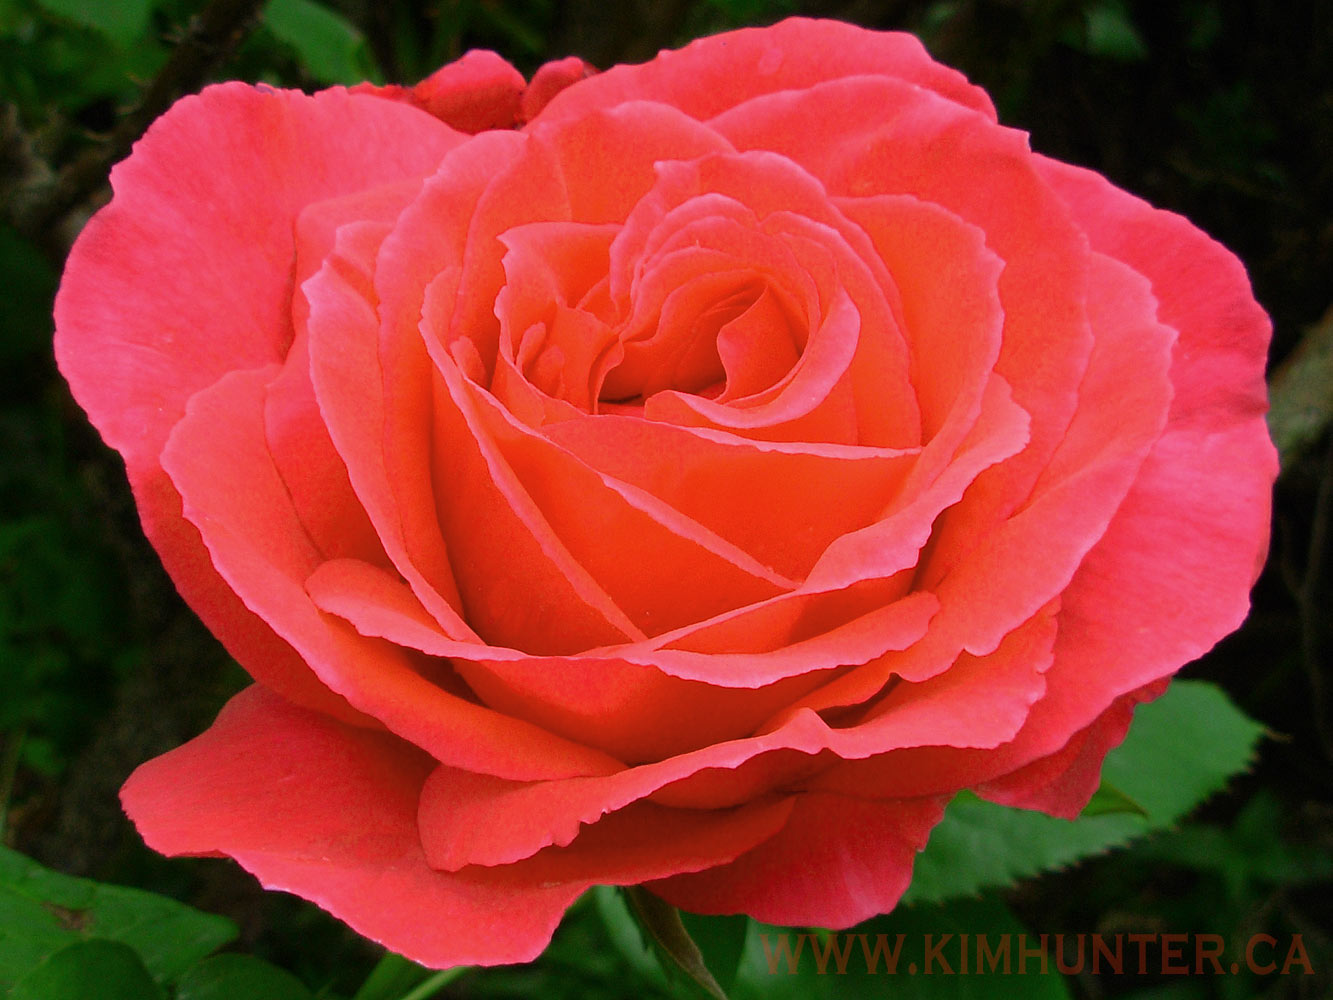

In [9]:
image_path = "rose.jpg"

from IPython.display import Image
Image(filename=image_path) 

Now load the image into tensorflow, load the model of the network into tensorflow, predict the labels and print the predicted labels.

In [10]:
import tensorflow as tf

# Read in the image_data
image_data = tf.gfile.FastGFile(image_path, 'rb').read()

# Loads label file, strips off carriage return
label_lines = [line.rstrip() for line 
                   in tf.gfile.GFile("tf_files/retrained_labels.txt")]

# Unpersists graph from file
with tf.gfile.FastGFile("tf_files/retrained_graph.pb", 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    _ = tf.import_graph_def(graph_def, name='')

with tf.Session() as sess:
    # Feed the image_data as input to the graph and get first prediction
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
    
    predictions = sess.run(softmax_tensor, \
             {'DecodeJpeg/contents:0': image_data})
    
    # Sort to show labels of first prediction in order of confidence
    top_k = predictions[0].argsort()[-len(predictions[0]):][::-1]
    
    for node_id in top_k:
        human_string = label_lines[node_id]
        score = predictions[0][node_id]
        print('%s (score = %.5f)' % (human_string, score))


roses (score = 0.92116)
tulips (score = 0.06409)
dandelion (score = 0.00706)
sunflowers (score = 0.00636)
daisy (score = 0.00133)


Yay, it seems to be a rose.